# Summary
This jupyter notebook goes over two things:
### 1. KNN
### 2. Decision Trees

Please make sure you have installed all dependencies used in the notebook.


In [62]:
import pandas as pd
import sys, os
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
def load_csv(fp):
    return pd.read_csv(fp)

# Section 1 KNN

The process to fitting a knn model to data is summarized below:
- Load the data using ```load_csv()``` wrapper function
- Segregate the features and target data
- Split data into training and testing partitions using ```train_test_split()```
- Standardize the data using ```StandardScalar()
- Implement ```KNeightborsClassifier``` to fit a model to the data
- Obtain the model accuracy using ```metrics.accuracy_score()```
- Output the accuracies for comparison across two metrics and two K values

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
root = sys.path[0]
filepath = os.path.join(root, 'iris.csv')

raw_iris = load_csv(filepath)

print(raw_iris.groupby('variety').count())


            sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa                50           50            50           50
Versicolor            50           50            50           50
Virginica             50           50            50           50


We can see there are 50 data points for each variety.  We will also standardize the data, as often the units in KNN are abitrary. Next, we will split the data using ```sklearn.model_selection.train_test_split()```

In [65]:
# gather the features and labels from the data into separate dataframes
iris_features = raw_iris.drop('variety', axis=1)
iris_labels = raw_iris.variety
print("Pre normalization.. \n")
print(iris_features)


Pre normalization.. 

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [66]:
iris_ftrain, iris_ftest, iris_ltrain, iris_ltest = train_test_split(iris_features, 
                                                                    iris_labels, 
                                                                    train_size=0.7,  
                                                                    random_state=42, 
                                                                    stratify=iris_labels)
print("Data shapes")
print(f"training feature shape: {iris_ftrain.shape}")
print(f"test set feature shape: {iris_ftest.shape}")
print(f"training labels shape: {iris_ltrain.shape}")
print(f"test set labels shape: {iris_ltest.shape}")


# standardize both the training and test feature data
scalar = StandardScaler()
iris_std_train = scalar.fit_transform(iris_ftrain)
iris_std_test  = scalar.fit_transform(iris_ftest)


Data shapes
training feature shape: (105, 4)
test set feature shape: (45, 4)
training labels shape: (105,)
test set labels shape: (45,)


Now that our data is split into 70% training and test data, we will apply the KNN algorithm.

Note:
- ```iris_std_train``` : the features for training
- ```iris_std_test```  : the features for testing
- ```iris_ltrain``` : the labels for training
- ```iris_ltest```  : the labels for testing

In [67]:
k_vals = [2,3] # k values to use
distances = ['manhattan', 'euclidean']
accuracies = {}
for k in k_vals:
    for distance in distances:
        knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=distance) # make classifier object
        knn_classifier.fit(iris_std_train, iris_ltrain) # fit classifier onto training data
        label_predictions = knn_classifier.predict(iris_std_test) # make predictions using model, storing labels in label_predictions
        accuracies[f"{k}_{distance}"] = accuracy_score(iris_ltest, label_predictions) # calculate accuracy by comparing the true test set labels against predicted

print("See results below, in format {K value}_{distance} : accuracy")
for k,v in accuracies.items():
    print(f"{k} : {v}")


See results below, in format {K value}_{distance} : accuracy
2_manhattan : 0.9333333333333333
2_euclidean : 0.9333333333333333
3_manhattan : 0.9111111111111111
3_euclidean : 0.8666666666666667


From the above output, it is seen that a K value of 2 performs with higher accuracy than 3.  The K value of 2 also has the same accuracy for both manhatton and euclidean distance metrics, whereas a K value of 3 presents difference accuracies across the two metrics.

# Section 2 Decision Trees

In [68]:
import graphviz # for visualizing trees
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# from sklearn.tree import export_graphviz # for plotting
# from IPython.display import Image
# from sklearn.externals.six import StringIO  
# import pydotplus


The process to fitting a decision tree model to data is similar to that of KNN.  

We will perform the following for analysis:
- Load the data using ```load_csv()``` wrapper function
- Segregate the features and target data
- Split data into training and testing partitions using ```train_test_split()```
- Standardize the data using ```StandardScalar()
- Implement ```DecisionTreeClassifier``` to fit a model to the data
- Obtain the model accuracy using ```metrics.accuracy_score()```
- Plot the decision tree to view all the nodes using ```sklearn.tree.export_graphviz```


In [84]:
root_path = sys.path[0]
file_path = os.path.join(root_path, 'heart.csv')

raw_heart_data = load_csv(file_path)
print(raw_heart_data.head())
print("\nBelow are counts of each feature per label")
print(raw_heart_data.groupby('target').count())
target_vals = [str(val) for val in raw_heart_data.target.unique()] # cast target values to string for tree labelling later.

   sex  cp  fbs  restecg  exang  target
0    1   1    1        0      0       1
1    1   1    0        1      0       1
2    0   1    0        0      0       1
3    1   1    0        1      0       1
4    0   0    0        1      1       1

Below are counts of each feature per label
        sex   cp  fbs  restecg  exang
target                               
0       138  138  138      138    138
1       165  165  165      165    165


We aim to separate the target column (the labels) from the features (sex, cp, fbs, restecg, exang), and then split the data into training and test sets using ```train_test_split()```

In [85]:
heart_features = raw_heart_data.drop('target', axis=1)
heart_labels = raw_heart_data.target
heart_ftrain, heart_ftest, heart_ltrain, heart_ltest = train_test_split(heart_features, 
                                                                       heart_labels,
                                                                       train_size=0.8,  
                                                                       random_state=42, 
                                                                       stratify=heart_labels)
# now standardize using StandardScalar()

scaler = StandardScaler()
heart_std_train = scalar.fit_transform(heart_ftrain)
heart_std_test = scalar.fit_transform(heart_ftest)

Now that our data is split into 70% training and test data, we will fit a decision tree.

Note:
- ```heart_ftrain``` : the features for training
- ```heart_std_test```  : the features for testing
- ```heart_ltrain``` : the labels for training
- ```heart_ltest```  : the labels for testing

gini : 0.6885245901639344
entropy : 0.6885245901639344


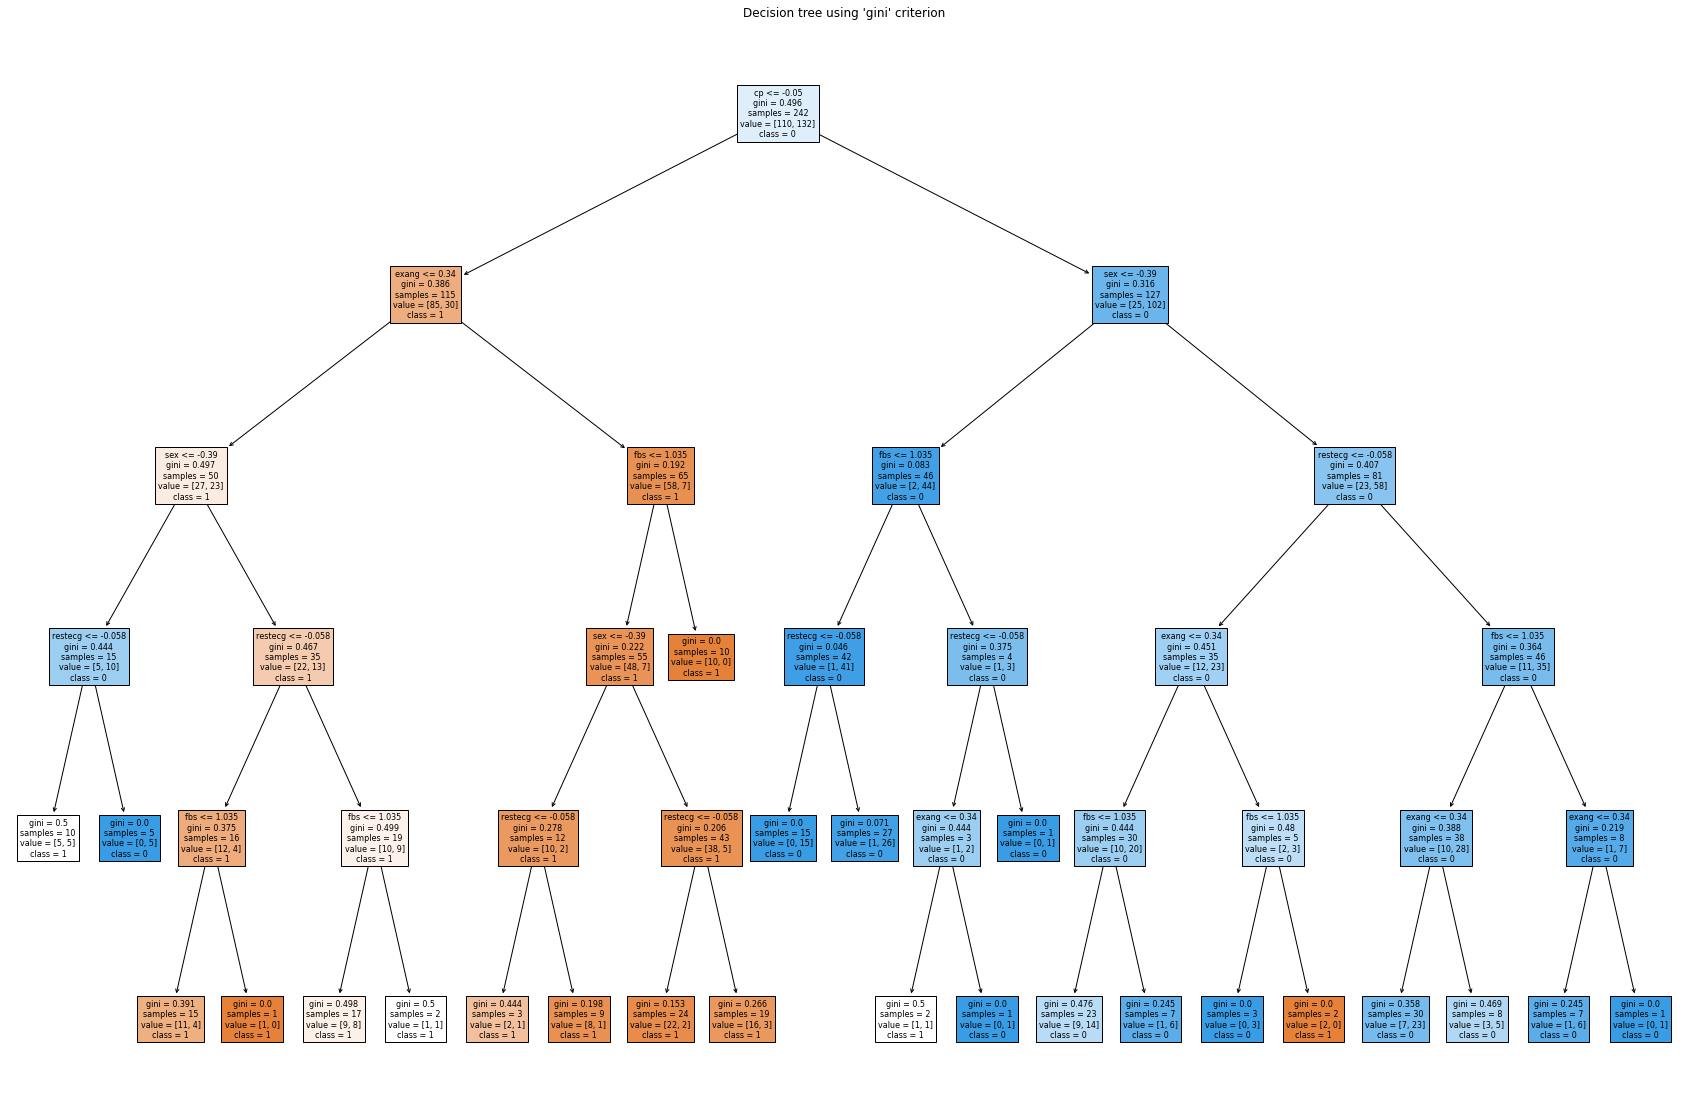

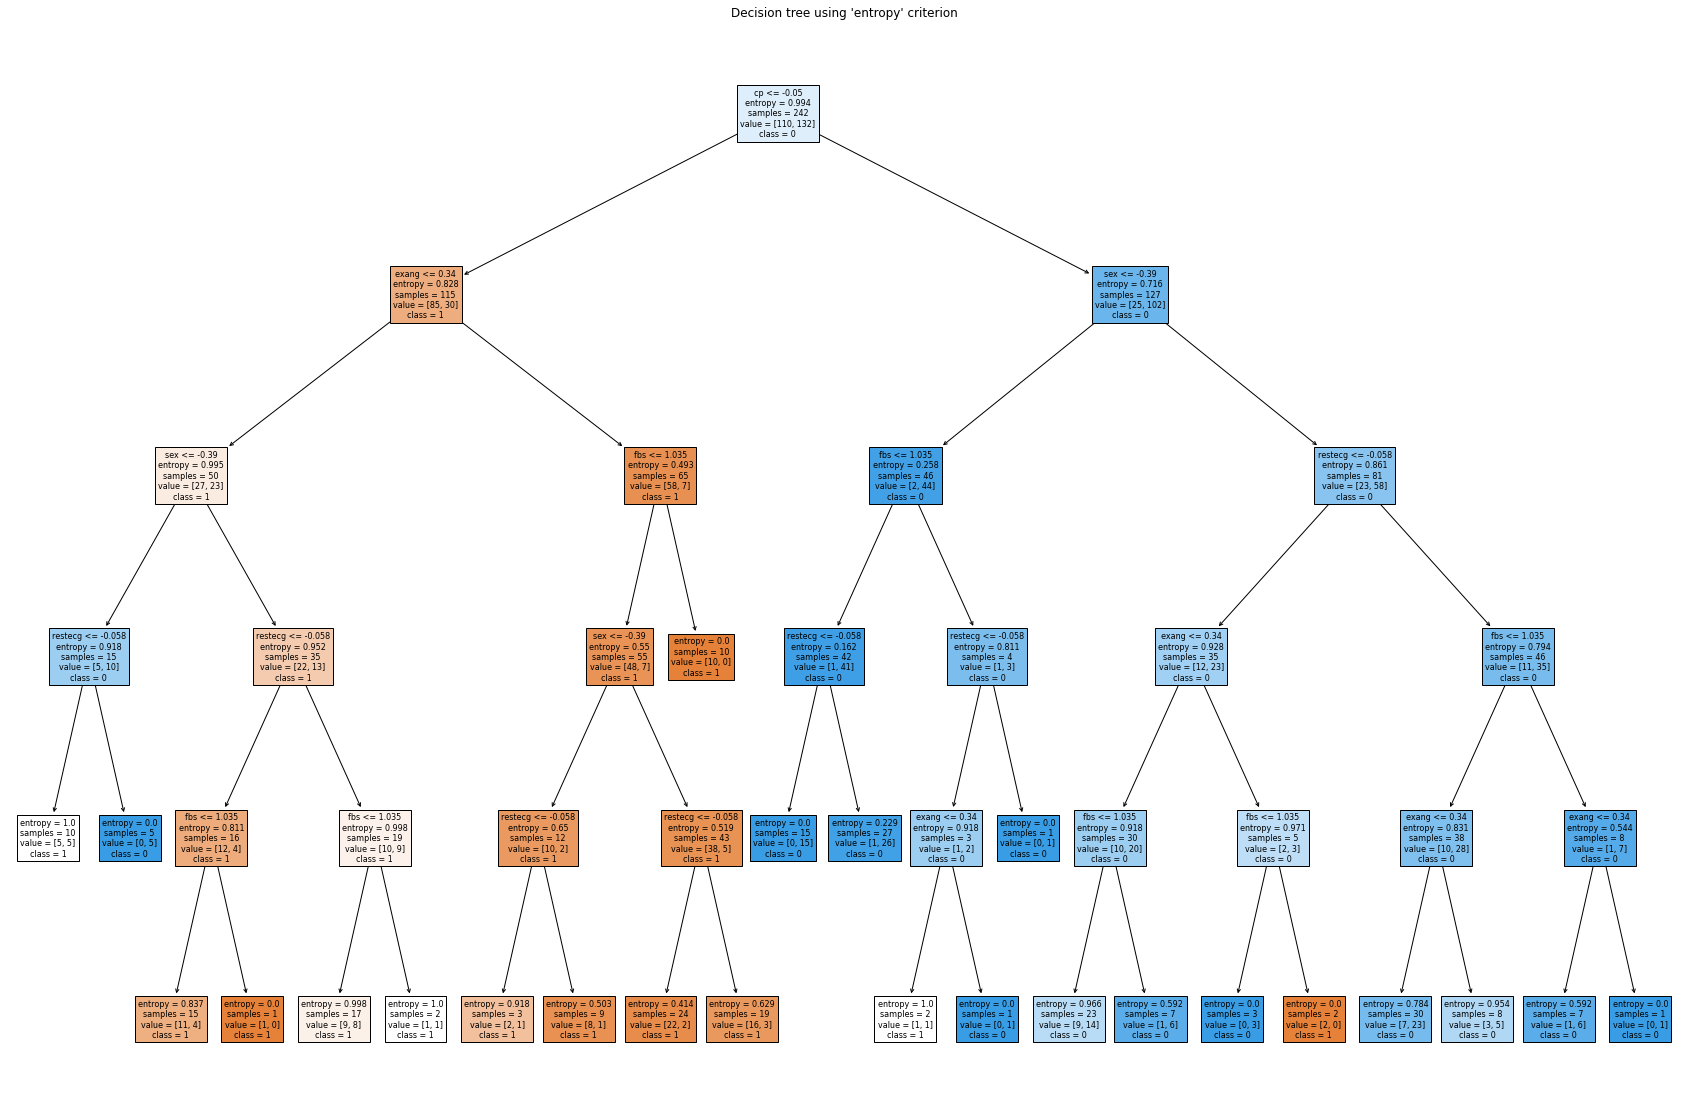

In [86]:
criterion_list = ['gini', 'entropy']
accuracies = {}
for criterion in criterion_list:
    dec_tree_classf = DecisionTreeClassifier(criterion=criterion)                                          
    dec_tree_classf.fit(heart_std_train, heart_ltrain)
    fig = plt.figure(figsize=(30,20))
    _ = tree.plot_tree(dec_tree_classf,
                       feature_names=heart_features.columns,
                       class_names=target_vals,
                       filled=True)
    plt.title(f"Decision tree using '{criterion}' criterion")
    predicted_labels = dec_tree_classf.predict(heart_std_test)
    accuracies[criterion] = accuracy_score(heart_ltest, predicted_labels)
    
for k,v in accuracies.items():
    print(f"{k} : {v}")